# Imports

In [1]:
from joblib import load
from geopandas import read_parquet
from distance import import_origins_destinations
from districts import P_HOME_FRED
import matplotlib.pyplot as plt

/home/fred/projects/google-maps-distance/districts.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_belgium.distance(P_HOME_FRED).sort_values().index[:n_districts], cols
/home/fred/projects/google-maps-distance/districts.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_home_fred["center"] = gdf_home_fred.centroid


# Exploring near my home

Below I make plot of the districts and Colruyt Group shops around my home  
If all goes well, my home should be within a district, and on top of a store.  
Let's find out ...

I find it important to have a look at some samples of the data, as well as data types.  
Using appropriate data types allow for easy plotting

In [2]:
list_input_files = ["districts_near_my_home.parquet", "shops_near_my_home.parquet"]
gdf_districts, gdf_shops = import_origins_destinations(*list_input_files)

In [3]:
gdf_districts.head()

,nis_district,district_name,city_name,geometry,center
2959,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991)
2955,23027A011,BASCUUL,HALLE,"POLYGON Z ((4.23185 50.73995 0.00000, 4.23368 ...",POINT (4.22990 50.73695)
2954,23027A00-,HALLE-CENTRUM,HALLE,"POLYGON Z ((4.24183 50.73649 0.00000, 4.24187 ...",POINT (4.23646 50.73584)
2961,23027A091,ELBEEK,HALLE,"POLYGON Z ((4.22642 50.73960 0.00000, 4.22633 ...",POINT (4.22282 50.73545)
2970,23027A1PA,OUDE NAAM - RODENEM,HALLE,"POLYGON Z ((4.23598 50.72723 0.00000, 4.23573 ...",POINT (4.23708 50.72247)


In [4]:
gdf_districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10 entries, 2959 to 2956
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   nis_district   10 non-null     object  
 1   district_name  10 non-null     object  
 2   city_name      10 non-null     object  
 3   geometry       10 non-null     geometry
 4   center         10 non-null     geometry
dtypes: geometry(2), object(3)
memory usage: 480.0+ bytes


In [5]:
gdf_shops.head()

,place_id,name,filiaalnr,geometry
292,2508,Dreamland Halle,5220,POINT (4.23249 50.73224)
285,1811,BIO-PLANET HALLE,5381,POINT (4.23227 50.73175)
291,2817,Dreambaby Halle,7623,POINT (4.22792 50.73002)
293,915,SPAR HALLE,4179,POINT (4.24559 50.72626)
290,2453,DATS 24 LEMBEEK,4027,POINT (4.22421 50.71959)


In [6]:
gdf_shops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 50 entries, 292 to 128
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   place_id   50 non-null     int64   
 1   name       50 non-null     object  
 2   filiaalnr  50 non-null     object  
 3   geometry   50 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.0+ KB


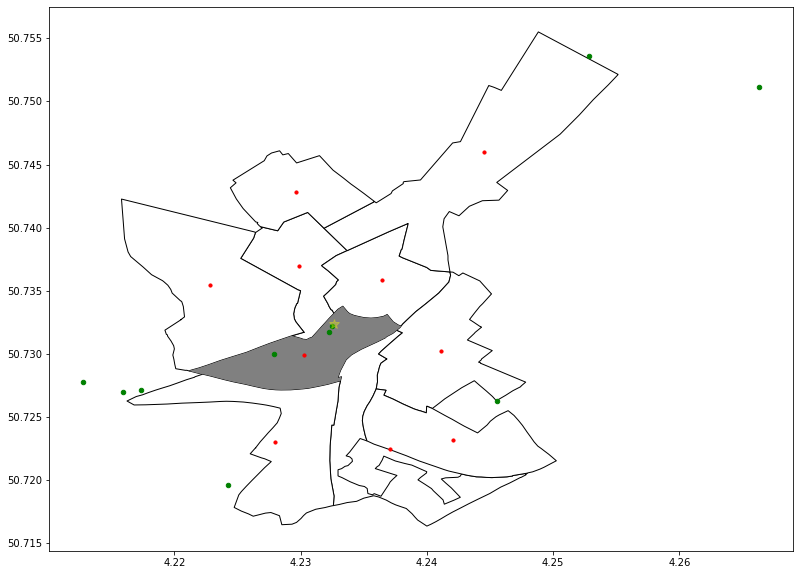

In [7]:
fig, ax = plt.subplots(figsize=(16, 10))
# prepare bacbground with the districts
ax_near_home = gdf_districts.plot(ax=ax, color="white", edgecolor="black")
# Add a yellow transparant star to my home
ax_near_home.plot(
    P_HOME_FRED.x, P_HOME_FRED.y, marker="*", markersize=10, color="yellow", alpha=0.3
)
# Gray home district_near_home
gdf_districts.head(1).plot(ax=ax_near_home, color="gray")
# Red dot centroids
gdf_districts["center"].plot(ax=ax_near_home, marker="o", color="red", markersize=10)
# closest 10 shops near my home
gdf_shops.head(10).plot(ax=ax_near_home, marker="o", color="green", markersize=20)
plt.show()

# Exploring API json results

## Google distance matrix api results

Let's explore the JSON respons from the distance_matrix api call.  
Use the [offical docs](https://developers.google.com/maps/documentation/distance-matrix/distance-matrix) for more details

* `origin_addresses` and `destination_addresses` the address corresponding to the request we made.
* 10 `rows` corresponding with our origins
  * each has 10 `elements` corresponding with our destination

In [8]:
drive_times_google = load("google_drive_times.pickle")
drive_times_google.keys()

dict_keys(['destination_addresses', 'origin_addresses', 'rows', 'status'])

In [9]:
drive_times_google["origin_addresses"]

['Chau. de Mons 127, 1500 Hal, Belgium',
 'Tramstraat 2, 1500 Halle, Belgium',
 'Maandagmarkt 11, 1500 Halle, Belgium',
 'Grote Weide 6, 1500 Halle, Belgium',
 'Biezeweide 207-207, 1500 Halle, Belgium',
 'Sint-Rochusstraat 81, 1500 Halle, Belgium',
 'Chau. de Mons 413, 1500 Hal, Belgium',
 'Brusselsesteenweg 328, 1500 Halle, Belgium',
 'Heuvelpark 31, 1500 Halle, Belgium',
 'Gaasbeeksesteenweg 6, 1500 Halle, Belgium']

In [10]:
drive_times_google["destination_addresses"]

['Chau. de Mons 83, 1500 Hal, Belgium',
 'Groebegrachtstraat 16, 1500 Halle, Belgium',
 'Edingensesteenweg 75, 1500 Halle, Belgium',
 'Nijvelsesteenweg 141, 1500 Halle, Belgium',
 'Chau. de Mons 505, 1500 Hal, Belgium',
 'Edingensesteenweg 300, 1500 Halle, Belgium',
 'Edingensesteenweg 300, 1500 Halle, Belgium',
 'Zinkstraat 1, 1500 Halle, Belgium',
 'Alsembergsesteenweg 43, 1600 Sint-Pieters-Leeuw, Belgium',
 'Guido Gezellestraat 68, 1654 Beersel, Belgium']

In [11]:
len(drive_times_google["rows"]), len(drive_times_google["rows"][0]["elements"])

(10, 10)

In [12]:
# show the distance and duration for 1st origin / last destination
drive_times_google["rows"][0]["elements"][-1]

{'distance': {'text': '3.7 km', 'value': 3729},
 'duration': {'text': '8 mins', 'value': 490},
 'status': 'OK'}

## openrouteservice distance matrix api results

Let's explore the JSON respons from the distance_matrix api call.  
Use the [offical docs](https://openrouteservice.org/dev/#/api-docs/v2/matrix/{profile}/post) for more details.  

* 10 * 10 matrix `durations` and `distances` corresponding with our origins * destinations
* `destinations` containing snapping and streetname info for destinations
* `sources` containing snapping and streetname info for origins
* `metadata` we're currently not looking into

In [13]:
drive_times_ors = load("openrouteservice_drive_times.pickle")
drive_times_ors.keys()

dict_keys(['durations', 'distances', 'destinations', 'sources', 'metadata'])

In [14]:
len(drive_times_ors["durations"]), len(drive_times_ors["durations"][-1])

(10, 10)

In [15]:
# just an array with durations
drive_times_ors["durations"][-1][:3]

[288.25, 303.98, 283.97]

In [16]:
len(drive_times_ors["distances"]), len(drive_times_ors["distances"][-1])

(10, 10)

In [17]:
drive_times_ors["destinations"][0]

{'location': [4.232767, 50.732144],
 'name': 'Groebegrachtstraat',
 'snapped_distance': 22.51}

## TomTom synchronous matrix api results

Let's explore the JSON respons from the synchronous_matrix api call.  
Use the [offical docs](https://developer.tomtom.com/routing-api/documentation/matrix-routing-v2/synchronous-matrix) for more details.  

* `data` contains an array with length len(origins) * len(destinations)
  * each record has `originIndex`, `destinationIndex` and `routeSummary`
  * looks like it iterates over each origin first: (orgins 0:10) with (destination 0)
  * `lengthInMeters` and `travelTimeInSeconds` looks like what we need
* `statistics` contains summary stats

In [18]:
drive_times_tomtom = load("tomtom_drive_times.pickle")
drive_times_tomtom.keys()

dict_keys(['data', 'statistics'])

In [19]:
drive_times_tomtom["statistics"]

{'totalCount': 100, 'successes': 100, 'failures': 0}

In [20]:
len(drive_times_tomtom["data"])

100

In [21]:
drive_times_tomtom["data"][:2]

[{'originIndex': 0,
  'destinationIndex': 0,
  'routeSummary': {'lengthInMeters': 440,
   'travelTimeInSeconds': 122,
   'trafficDelayInSeconds': 0,
   'trafficLengthInMeters': 0,
   'departureTime': '2022-08-19T16:57:58+02:00',
   'arrivalTime': '2022-08-19T17:00:00+02:00'}},
 {'originIndex': 1,
  'destinationIndex': 0,
  'routeSummary': {'lengthInMeters': 951,
   'travelTimeInSeconds': 272,
   'trafficDelayInSeconds': 0,
   'trafficLengthInMeters': 0,
   'departureTime': '2022-08-19T16:55:27+02:00',
   'arrivalTime': '2022-08-19T17:00:00+02:00'}}]

# Exploring traveltime

Traveltime contains 1 record per (orgin, destination) ==> 10 * 10 = 100 rows.  

Important columns to note:

* `o_centroid_lng_lat`, `d_centroid_lng_lat` contain the points for origin and destination
* `nis_district`, `filiaalnr` are a functional represenation of origin and destination
* `district_name`, `shop_name` are a functional human readable representation of origin and destination
* `g_distance_m`, `ors_distance_m` and `tt_distance_m` contain the distance (g for google, ors for openstreetservice, tt for tomtom)
* `g_traveltime_s`, `ors_traveltime_s` and `tt_traveltime_s` contain the duration (g for google, ors for openstreetservice, tt for tomtom)

In [22]:
gdf_traveltime = load("traveltime_shops_near_home.pickle")
gdf_traveltime.shape[0]

100

In [23]:
gdf_traveltime.head()

,nis_district,district_name,city_name,nis_geometry,o_centroid_lng_lat,o_g_address,place_id,shop_name,filiaalnr,d_centroid_lng_lat,d_g_address,g_distance_m,g_traveltime_s,g_status,ors_distance_m,ors_traveltime_s,tt_distance_m,tt_traveltime_s
0,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991),"Chau. de Mons 127, 1500 Hal, Belgium",2508,Dreamland Halle,5220,POINT (4.23249 50.73224),"Chau. de Mons 83, 1500 Hal, Belgium",434,91,OK,431.06,104.28,440,122
1,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991),"Chau. de Mons 127, 1500 Hal, Belgium",1811,BIO-PLANET HALLE,5381,POINT (4.23227 50.73175),"Groebegrachtstraat 16, 1500 Halle, Belgium",486,106,OK,380.50,92.14,510,149
2,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991),"Chau. de Mons 127, 1500 Hal, Belgium",2817,Dreambaby Halle,7623,POINT (4.22792 50.73002),"Edingensesteenweg 75, 1500 Halle, Belgium",418,60,OK,468.92,96.84,413,85
3,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991),"Chau. de Mons 127, 1500 Hal, Belgium",915,SPAR HALLE,4179,POINT (4.24559 50.72626),"Nijvelsesteenweg 141, 1500 Halle, Belgium",1611,209,OK,1609.68,263.75,1601,227
4,23027A052,DE WIP,HALLE,"POLYGON Z ((4.23796 50.73221 0.00000, 4.23786 ...",POINT (4.23028 50.72991),"Chau. de Mons 127, 1500 Hal, Belgium",2453,DATS 24 LEMBEEK,4027,POINT (4.22421 50.71959),"Chau. de Mons 505, 1500 Hal, Belgium",1280,131,OK,1277.58,129.88,1256,102


In [24]:
cols_deviation = [
    "nis_district",
    "filiaalnr",
    "g_distance_m",
    "g_traveltime_s",
    "ors_distance_m",
    "ors_traveltime_s",
    "tt_distance_m",
    "tt_traveltime_s",
]
df_traveltime_deviation = gdf_traveltime[cols_deviation].copy()
# traveltimes
df_traveltime_deviation["delta_g_ors_s"] = (
    df_traveltime_deviation["g_traveltime_s"]
    - df_traveltime_deviation["ors_traveltime_s"]
)
df_traveltime_deviation["delta_g_tt_s"] = (
    df_traveltime_deviation["g_traveltime_s"]
    - df_traveltime_deviation["tt_traveltime_s"]
)
df_traveltime_deviation["delta_ors_tt_s"] = (
    df_traveltime_deviation["ors_traveltime_s"]
    - df_traveltime_deviation["tt_traveltime_s"]
)
# distances
df_traveltime_deviation["delta_g_ors_m"] = (
    df_traveltime_deviation["g_distance_m"] - df_traveltime_deviation["ors_distance_m"]
)
df_traveltime_deviation["delta_g_tt_m"] = (
    df_traveltime_deviation["g_distance_m"] - df_traveltime_deviation["tt_distance_m"]
)
df_traveltime_deviation["delta_ors_tt_m"] = (
    df_traveltime_deviation["ors_distance_m"] - df_traveltime_deviation["tt_distance_m"]
)
# traveltimes pct
df_traveltime_deviation["delta_g_ors_s_pct"] = (
    df_traveltime_deviation["g_traveltime_s"]
    - df_traveltime_deviation["ors_traveltime_s"]
) / df_traveltime_deviation["g_traveltime_s"]
df_traveltime_deviation["delta_g_tt_s_pct"] = (
    df_traveltime_deviation["g_traveltime_s"]
    - df_traveltime_deviation["tt_traveltime_s"]
) / df_traveltime_deviation["g_traveltime_s"]
df_traveltime_deviation["delta_ors_tt_s_pct"] = (
    df_traveltime_deviation["ors_traveltime_s"]
    - df_traveltime_deviation["tt_traveltime_s"]
) / df_traveltime_deviation["ors_traveltime_s"]
# distance pct
df_traveltime_deviation["delta_g_ors_m_pct"] = (
    df_traveltime_deviation["g_distance_m"] - df_traveltime_deviation["ors_distance_m"]
) / df_traveltime_deviation["g_distance_m"]
df_traveltime_deviation["delta_g_tt_m_pct"] = (
    df_traveltime_deviation["g_distance_m"] - df_traveltime_deviation["tt_distance_m"]
) / df_traveltime_deviation["g_distance_m"]
df_traveltime_deviation["delta_ors_tt_m_pct"] = (
    df_traveltime_deviation["ors_distance_m"] - df_traveltime_deviation["tt_distance_m"]
) / df_traveltime_deviation["ors_distance_m"]

In [25]:
df_traveltime_deviation.head()

,nis_district,filiaalnr,g_distance_m,g_traveltime_s,ors_distance_m,ors_traveltime_s,tt_distance_m,tt_traveltime_s,delta_g_ors_s,delta_g_tt_s,delta_ors_tt_s,delta_g_ors_m,delta_g_tt_m,delta_ors_tt_m,delta_g_ors_s_pct,delta_g_tt_s_pct,delta_ors_tt_s_pct,delta_g_ors_m_pct,delta_g_tt_m_pct,delta_ors_tt_m_pct
0,23027A052,5220,434,91,431.06,104.28,440,122,-13.28,-31,-17.72,2.94,-6,-8.94,-0.145934,-0.340659,-0.169927,0.006774,-0.013825,-0.020740
1,23027A052,5381,486,106,380.50,92.14,510,149,13.86,-43,-56.86,105.50,-24,-129.50,0.130755,-0.405660,-0.617104,0.217078,-0.049383,-0.340342
2,23027A052,7623,418,60,468.92,96.84,413,85,-36.84,-25,11.84,-50.92,5,55.92,-0.614000,-0.416667,0.122264,-0.121818,0.011962,0.119253
3,23027A052,4179,1611,209,1609.68,263.75,1601,227,-54.75,-18,36.75,1.32,10,8.68,-0.261962,-0.086124,0.139336,0.000819,0.006207,0.005392
4,23027A052,4027,1280,131,1277.58,129.88,1256,102,1.12,29,27.88,2.42,24,21.58,0.008550,0.221374,0.214660,0.001891,0.018750,0.016891


<AxesSubplot:>

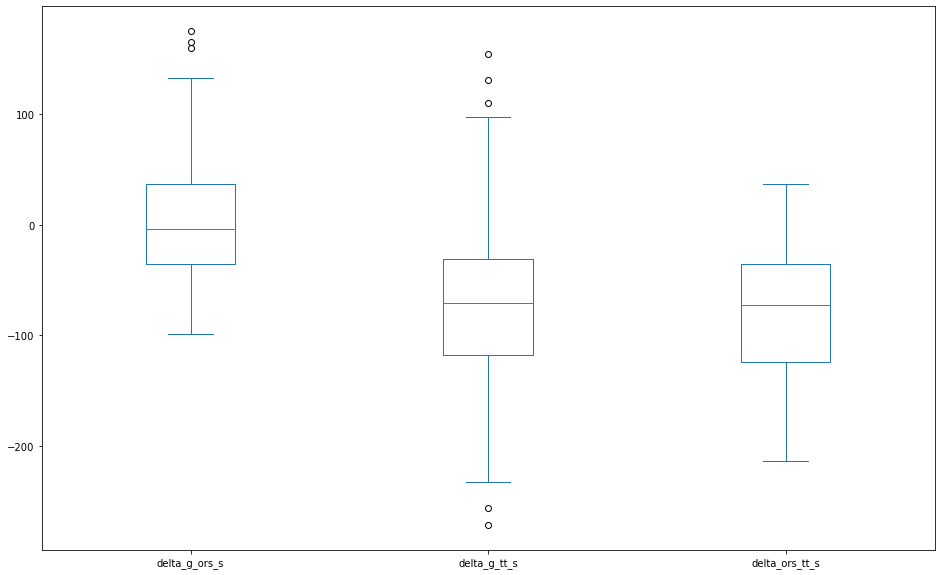

In [26]:
df_traveltime_deviation[["delta_g_ors_s", "delta_g_tt_s", "delta_ors_tt_s"]].plot(
    kind="box", figsize=(16, 10)
)

<AxesSubplot:ylabel='Frequency'>

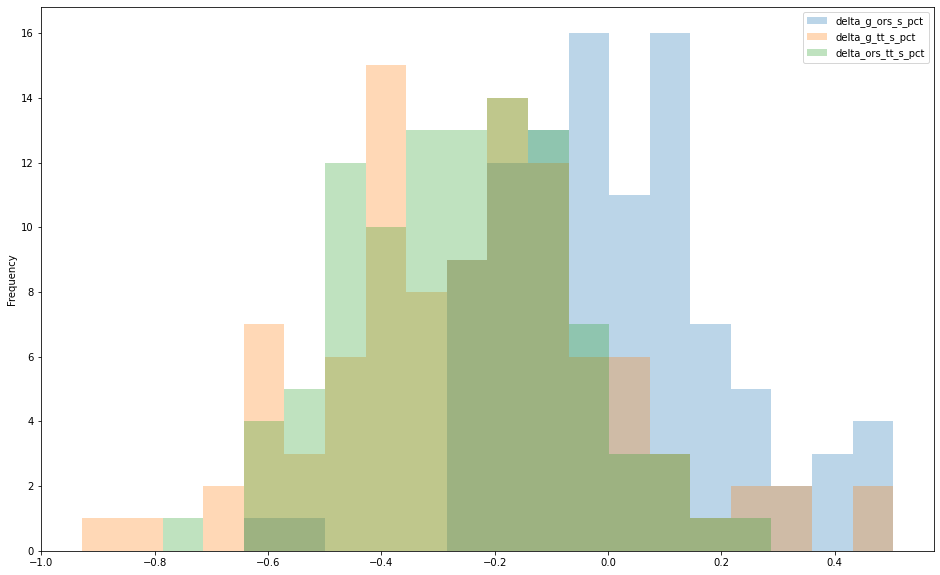

In [33]:
df_traveltime_deviation[
    ["delta_g_ors_s_pct", "delta_g_tt_s_pct", "delta_ors_tt_s_pct"]
].plot(kind="hist", bins=20, alpha=0.3, figsize=(16, 10))

<AxesSubplot:>

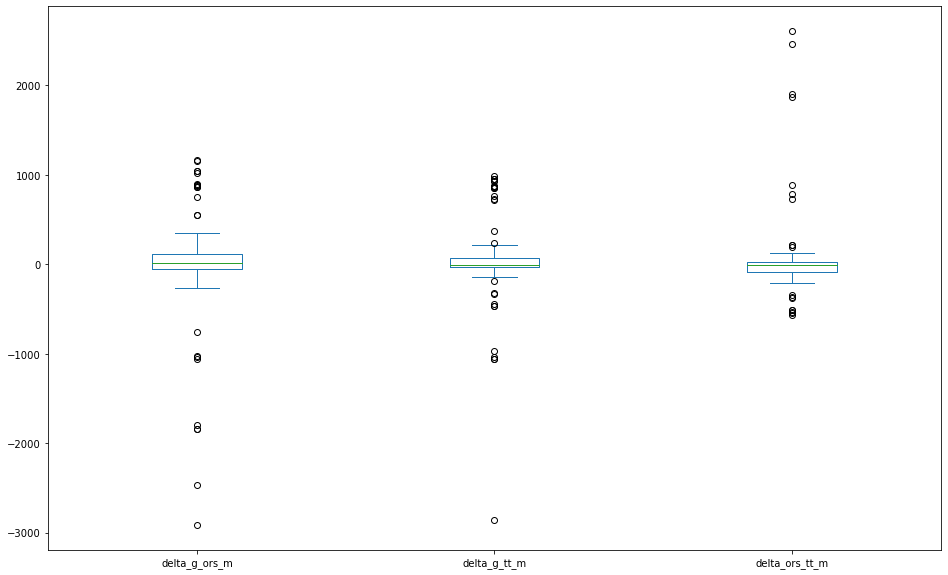

In [32]:
df_traveltime_deviation[["delta_g_ors_m", "delta_g_tt_m", "delta_ors_tt_m"]].plot(
    kind="box", figsize=(16, 10)
)

<AxesSubplot:ylabel='Frequency'>

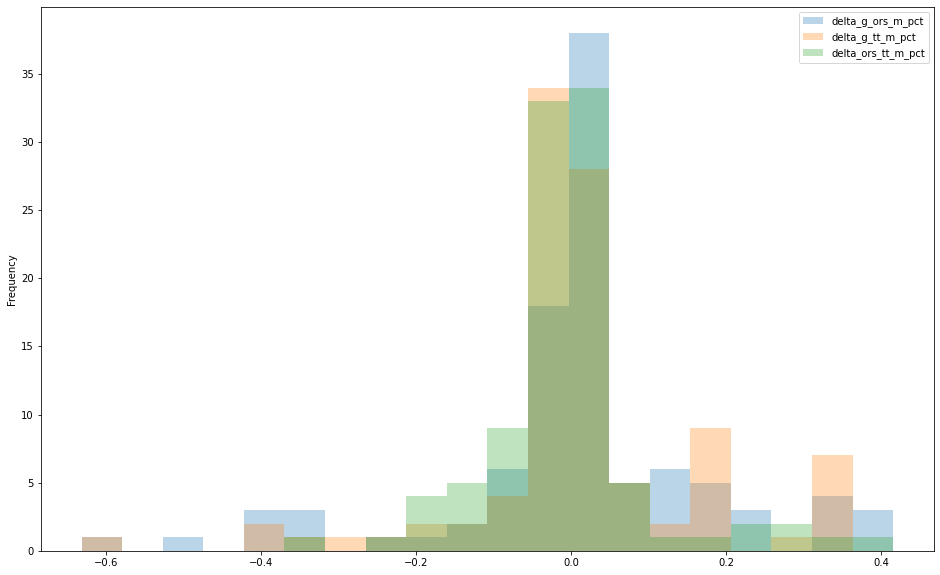

In [34]:
df_traveltime_deviation[
    ["delta_g_ors_m_pct", "delta_g_tt_m_pct", "delta_ors_tt_m_pct"]
].plot(kind="hist", bins=20, alpha=0.3, figsize=(16, 10))